# CS148 Project 2 - Binary Classification Comparative Methods

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results. 

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance. 

Specifically you will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Background: The Dataset 

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed. 

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> (1 = male; 0 = female)</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>cholserum:</b> Cholestoral in mg/dl</li>
    <li><b>fbs</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeakST:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-3) colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 7 = reversable defect</li>
    <li><b><u>Sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease)</li>
</ul>
    


## Loading Essentials and Helper Functions 

In [2]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold


from matplotlib import pyplot
import itertools

%matplotlib inline

import random 
  
random.seed(42) 

## Part 1. Load the Data and Analyze

Let's first load our dataset so we'll be able to work with it. (correct the relative path if your notebook is in a different directory than the csv file.)

In [3]:
heart = pd.read_csv('/content/drive/MyDrive/UCLA/Winter 2023/CS M148/Project 2/heartdisease.csv')

### Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method,  the describe method, and the info method to display some of the rows so we can visualize the types of data fields we'll be working with.

In [4]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


In [5]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  sick      303 non-null    bool   
dtypes: bool(1), float64(1), int64(12)
memory usage: 31.2 KB


### Sometimes data will be stored in different formats (e.g., string, date, boolean), but many learning methods work strictly on numeric inputs. Call the info method to determine the datafield type for each column. Are there any that are problemmatic and why?

The 'sick' variable is a boolean, while all other variables are numeric. This means we must convert the 'sick' column with a numeric encoding. 

### Determine if we're dealing with any null values. If so, report on which columns? 

In [7]:
null_cols = heart.isnull().sum()
null_cols

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
sick        0
dtype: int64

There are no null values.

### Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean sick variable into a binary numeric target variable (values of either '0' or '1'), and then drop the original sick datafield from the dataframe. (hint: try label encoder or .astype()

In [8]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
heart['sick'] = labelencoder.fit_transform(heart['sick'])
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0


### Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to ascertain how each variable performs (is it a binary, or limited selection, or does it follow a gradient? 

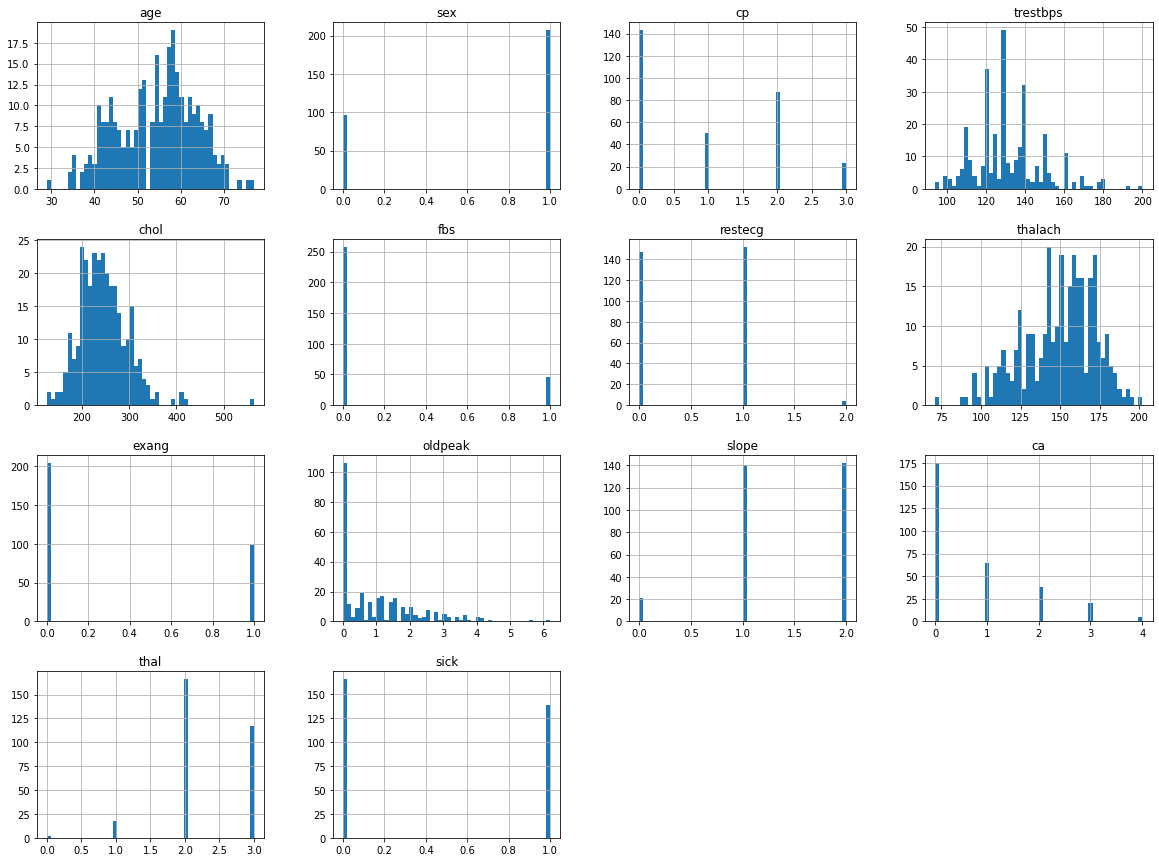

In [9]:
heart.hist(bins=50, figsize=(20,15))
plt.show()

### We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and report on the results: 

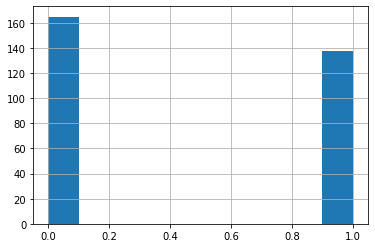

0    165
1    138
Name: sick, dtype: int64


In [10]:
heart['sick'].hist()
plt.show()
print(heart['sick'].value_counts())

There are 165 sick individuals and 138 healthy individuals.

### Balanced datasets are important to ensure that classifiers train adequately and don't overfit, however arbitrary balancing of a dataset might introduce its own issues. Discuss some of the problems that might arise by artificially balancing a dataset.

Artificially balancing a dataset can lead to overfitting, where the model involves too many parameters and overanalyzes possible trends in the data. There is also a chance that the testing data includes outliers or unusual values, so when testing the model with it, it results in poor predictions.

### Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, map out the correlations between the values, and then discuss the relationships you observe. Do some research on the variables to understand why they may relate to the observed corellations. Intuitively, why do you think some variables correlate more highly than others (hint: one possible approach you can use the sns heatmap function to map the corr() method)?

slope    oldpeak    0.577537
oldpeak  slope      0.577537
sick     exang      0.436757
exang    sick       0.436757
sick     cp         0.433798
cp       sick       0.433798
oldpeak  sick       0.430696
sick     oldpeak    0.430696
thalach  sick       0.421741
sick     thalach    0.421741
age      thalach    0.398522
thalach  age        0.398522
cp       exang      0.394280
exang    cp         0.394280
ca       sick       0.391724
sick     ca         0.391724
slope    thalach    0.386784
thalach  slope      0.386784
exang    thalach    0.378812
thalach  exang      0.378812
dtype: float64

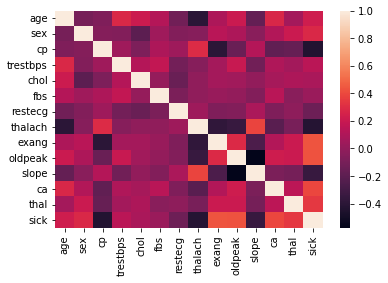

In [11]:
corr_matrix = heart.corr()
sns.heatmap(corr_matrix)
corr_matrix = corr_matrix.abs()
np.fill_diagonal(corr_matrix.values, np.nan)
stacked_corr = corr_matrix.stack()
sorted_corr = stacked_corr.sort_values(ascending=False)
sorted_corr.head(20)

There is a high positive correlation between sickness and exercise induced angina (exang). This makes sense because it means not enough blood flows to the heart, and it is a good indicator of heart disease. There is a strong negative correlation between sickness and chest pain. This also makes sense, because there is less chance of chest pain if a subject has a healthier heart.

## Part 2. Prepare the 'Raw' Data and run a KNN Model

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

Specifically, we're going to ask you to prepare 2 batches of data: 1. Will simply be the raw numeric data that hasn't gone through any additional pre-processing. The other, will be data that you pipeline using your own selected methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### Save the label column as a separate array and then drop it from the dataframe. 

In [12]:
labels = heart['sick'].copy()
del heart['sick']
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### First Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 80% of your total dataframe (hint: use the train_test_split() method) Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

heart_train, heart_test, sick_train, sick_test = train_test_split(heart, labels, test_size=0.2, random_state=42)
print(heart_train.shape)
print(heart_test.shape)
print(sick_train.shape)
print(sick_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


### We'll explore how not processing your data can impact model performance by using the K-Nearest Neighbor classifier. One thing to note was because KNN's rely on Euclidean distance, they are highly sensitive to the relative magnitude of different features. Let's see that in action! Implement a K-Nearest Neighbor algorithm on our raw data and report the results. For this initial implementation simply use the default settings. Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. Report on the accuracy of the resulting model.

In [14]:
# k-Nearest Neighbors algorithm
knn = KNeighborsClassifier()
knn.fit(heart_train, sick_train)

KNeighborsClassifier()

In [15]:
predicted = knn.predict(heart_test)
metrics.accuracy_score(sick_test, predicted)

0.6885245901639344

### Now implement a pipeline of your choice. You can opt to handle categoricals however you wish, however please scale your numeric features using standard scaler. Use the fit_transform() to fit this pipeline to your training data. and then transform() to apply that pipeline to your test data

### Pipeline:

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

In [17]:
# Pipeline my test data
num_pipeline = Pipeline([
  ('std_scaler', StandardScaler())
])

heart_transformed = num_pipeline.fit_transform(heart)
numerical_features = list(heart)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, numerical_features)
])

prepared_train = full_pipeline.fit_transform(heart_train)
prepared_test = full_pipeline.fit_transform(heart_test)

### Now retrain your model and compare the accuracy metrics with the raw and pipelined data. 

In [18]:
# k-Nearest Neighbors algorithm
knn = KNeighborsClassifier()
knn.fit(prepared_train, sick_train)

KNeighborsClassifier()

In [19]:
predicted = knn.predict(prepared_test)
metrics.accuracy_score(sick_test, predicted)

0.9016393442622951

The raw data has a 68.9% accuracy, while the pipelined data has a 90.2% accuracy.

### Parameter Optimization.  The KNN Algorithm includes an n_neighbors attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Lets now try n values of: 1, 2, 3, 5, 7, 9, 10, 20, and 50. Run your model for each value and report the accuracy for each. (HINT leverage python's ability to loop to run through the array and generate results without needing to manually code each iteration).

In [20]:
n = [1, 2, 3, 5, 7, 9, 10, 20, 50]
for i in n:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(prepared_train, sick_train)
  predicted = knn.predict(prepared_test)
  metrics.accuracy_score(sick_test, predicted)
  print(str(i) + "%-2s %f" % (":", metrics.accuracy_score(sick_test, predicted)))

1:  0.819672
2:  0.803279
3:  0.868852
5:  0.901639
7:  0.868852
9:  0.885246
10:  0.885246
20:  0.868852
50:  0.852459


## Part 3. Additional Learning Methods 

So we have a model that seems to work well. But let's see if we can do better! To do so we'll employ multiple learning methods and compare result.

### Linear Decision Boundary Methods 

### Logistic Regression

Let's now try another classifier,one that's well known for handling linear models: Logistic Regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

### Implement a Logistical Regression Classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model. 

### This time in addition to accuracy report metrics for: 
1.   Accuracy
2.   Precision
3.   Recall
4.   F1 Score



In [21]:
# Logistic Regression
log_reg_1 = LogisticRegression()
log_reg_1.fit(prepared_train, sick_train)
predicted = log_reg_1.predict(prepared_test)

print("%-12s %f" % ("Accuracy:", metrics.accuracy_score(sick_test, predicted)))
print("%-12s %f" % ("Precision:", metrics.precision_score(sick_test, predicted)))
print("%-12s %f" % ("Recall:", metrics.recall_score(sick_test, predicted)))
print("%-12s %f" % ("F1 Score:", metrics.f1_score(sick_test, predicted)))

Accuracy:    0.885246
Precision:   0.892857
Recall:      0.862069
F1 Score:    0.877193


### Discuss what each measure is reporting, why they are different, and why are each of these measures is significant. Explore why we might choose to evaluate the performance of differing models differently based on these factors. Try to give some specific examples of scenarios in which you might value one of these measures over the others.

The accuracy is the proportion of correct predictions that the model makes. It is useful if you want to know the percentage of correct predictions you got. The precision score is the proportion of true positives out of all positive predictions. It is useful to determine when the cost of a false positive is high. The recall score is the proportion of true positives out of all true and false positives. It is useful if you want to know your model's false positive rate. The F1 score is the average of the precision and recall scores. It is useful when your data is unbalanced; for example, one class may have significantly more members than another class.


### Let's tweak a few settings. First let's set your solver to 'sag', your max_iter= 10, and set penalty = 'none' and rerun your model. Let's see how your results change!

In [22]:
# Logistic Regression
log_reg_2 = LogisticRegression(solver='sag', max_iter=10, penalty='none')
log_reg_2.fit(prepared_train, sick_train)
predicted = log_reg_2.predict(prepared_test)

print("%-12s %f" % ("Accuracy:", metrics.accuracy_score(sick_test, predicted)))
print("%-12s %f" % ("Precision:", metrics.precision_score(sick_test, predicted)))
print("%-12s %f" % ("Recall:", metrics.recall_score(sick_test, predicted)))
print("%-12s %f" % ("F1 Score:", metrics.f1_score(sick_test, predicted)))

Accuracy:    0.885246
Precision:   0.892857
Recall:      0.862069
F1 Score:    0.877193


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Did you notice that when you ran the previous model you got the following warning: "ConvergenceWarning: The max_iter was reached which means the coef_ did not converge". Check the documentation and see if you can implement a fix for this problem, and again report your results.

In [23]:
# Logistic Regression
log_reg_3 = LogisticRegression(solver='sag', penalty='none')
log_reg_3.fit(prepared_train, sick_train)
predicted = log_reg_3.predict(prepared_test)

print("%-12s %f" % ("Accuracy:", metrics.accuracy_score(sick_test, predicted)))
print("%-12s %f" % ("Precision:", metrics.precision_score(sick_test, predicted)))
print("%-12s %f" % ("Recall:", metrics.recall_score(sick_test, predicted)))
print("%-12s %f" % ("F1 Score:", metrics.f1_score(sick_test, predicted)))

Accuracy:    0.885246
Precision:   0.892857
Recall:      0.862069
F1 Score:    0.877193


### Explain what you changed, and why do you think that may have altered the outcome. 

I changed max_iter from 10 to the default value of 100. The error meant that there weren't enough iterations for the coefficients to converge.

### Rerun your logistic classifier, but modify the penalty = 'l1', solver='liblinear' and again report the results.

In [24]:
log_reg_4 = LogisticRegression(solver='liblinear', penalty='l1')
log_reg_4.fit(prepared_train, sick_train)
predicted = log_reg_4.predict(prepared_test)

print("%-12s %f" % ("Accuracy:", metrics.accuracy_score(sick_test, predicted)))
print("%-12s %f" % ("Precision:", metrics.precision_score(sick_test, predicted)))
print("%-12s %f" % ("Recall:", metrics.recall_score(sick_test, predicted)))
print("%-12s %f" % ("F1 Score:", metrics.f1_score(sick_test, predicted)))

Accuracy:    0.885246
Precision:   0.892857
Recall:      0.862069
F1 Score:    0.877193


### Explain what what the two solver approaches are, and why liblinear may have produced an improved outcome (but not always, and it's ok if your results show otherwise!). 

Liblinear is used for smaller datasets, and it minimizes values in a loop. Sag is used for larger datasets, and it reaches convergence faster. I got the same result for both.

### SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

### Implement a Support Vector Machine classifier on your pipelined data. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings, but set probability = True.

In [34]:
# SVM
svm = SVC(probability=True)
svm = svm.fit(prepared_train, sick_train)
sick_predicted = svm.predict(prepared_test)

### Report the accuracy, precision, recall, F1 Score, of your model, but in addition, plot a Confusion Matrix of your model's performance

recommend using the `from sklearn.metrics import plot_confusion_matrix` library for this one!


In [35]:
from sklearn.metrics import plot_confusion_matrix

print("%-12s %f" % ("Accuracy:", metrics.accuracy_score(sick_test, sick_predicted)))
print("%-12s %f" % ("Precision:", metrics.precision_score(sick_test, sick_predicted)))
print("%-12s %f" % ("Recall:", metrics.recall_score(sick_test, sick_predicted)))
print("%-12s %f" % ("F1 Score:", metrics.f1_score(sick_test, sick_predicted)))

Accuracy:    0.868852
Precision:   0.888889
Recall:      0.827586
F1 Score:    0.857143


In [36]:
confusion_matrix(sick_test, sick_predicted)

array([[29,  3],
       [ 5, 24]])

### Plot a Receiver Operating Characteristic curve, or ROC curve, and describe what it is and what the results indicate

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


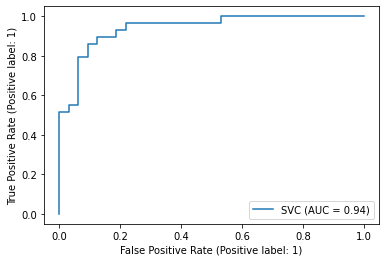

In [38]:
metrics.plot_roc_curve(svm, prepared_test, sick_test)

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The area under an ROC curve is a measure of the usefulness of a test in general, where a greater area means a more useful test, so the areas under ROC curves are used to compare the usefulness of tests. Here we see a relatively high area under the curve, indicating a highly performing model.

### Rerun your SVM, but now modify your model parameter kernel to equal 'linear'. Again report your Accuracy, Precision, Recall, F1 scores, and Confusion matrix and plot the new ROC curve.  

In [42]:
# SVM
svm_2 = SVC(probability=True, kernel="linear")
svm_2 = svm_2.fit(prepared_train, sick_train)
sick_pred_2 = svm_2.predict(prepared_test)

print("%-12s %f" % ("Accuracy:", metrics.accuracy_score(sick_test, sick_pred_2)))
print("%-12s %f" % ("Precision:", metrics.precision_score(sick_test, sick_pred_2)))
print("%-12s %f" % ("Recall:", metrics.recall_score(sick_test, sick_pred_2)))
print("%-12s %f" % ("F1 Score:", metrics.f1_score(sick_test, sick_pred_2)))

Accuracy:    0.885246
Precision:   0.892857
Recall:      0.862069
F1 Score:    0.877193


In [43]:
confusion_matrix(sick_test, sick_pred_2)

array([[29,  3],
       [ 4, 25]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


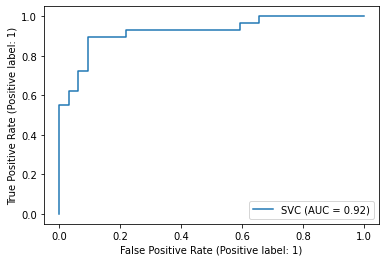

In [44]:
metrics.plot_roc_curve(svm_2, prepared_test, sick_test)

### Explain the what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed.

A linear kernel separates the data when classifying it with a linear model. I think the dataframe I used was too small to see any noticeable changes. But with a bigger dataset, changing the input parameter can impact results due to changing the classification method.

### Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary, then what’s the difference between their ways to find this boundary?

Logistic regression uses log-likelihood optimization to find the likelihood that a point is in a class. SVM finds the strict classification by maximizing the margin between the decision boundary and the closest points.